In [3]:
import numpy as np
import pandas as pd

# from rl_agent.game_environment import GameEnvironment

# env = GameEnvironment("SPY", "2021-01-01", 2)
# await env.prepare_state_data()
# df = env.state_data_df.copy()
# df["calc_true"]=np.where(~df["IV"].isnull(), True, False)
df = pd.read_csv("research_data/2021-01-01-SPY.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994435 entries, 0 to 1994434
Data columns (total 28 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   as_of_date                    object 
 1   stock_close_price             float64
 2   stock_volume                  float64
 3   stock_number_of_transactions  int64  
 4   options_ticker                object 
 5   expiration_date               object 
 6   strike_price                  float64
 7   contract_type                 object 
 8   shares_per_contract           int64  
 9   opt_close_price               float64
 10  opt_volume                    float64
 11  opt_number_of_transactions    int64  
 12  flag                          object 
 13  flag_put                      int64  
 14  DTE                           int64  
 15  T                             float64
 16  risk_free_rate                float64
 17  IV                            float64
 18  delta                 

In [18]:
distro_df = df[["as_of_date", "calc_true", "flag_put", "opt_close_price", "opt_number_of_transactions"]].groupby(["as_of_date","calc_true", "flag_put"]).agg({"opt_close_price": "sum", "opt_number_of_transactions": "sum"})
distro_df.reset_index(drop=False, inplace = True)

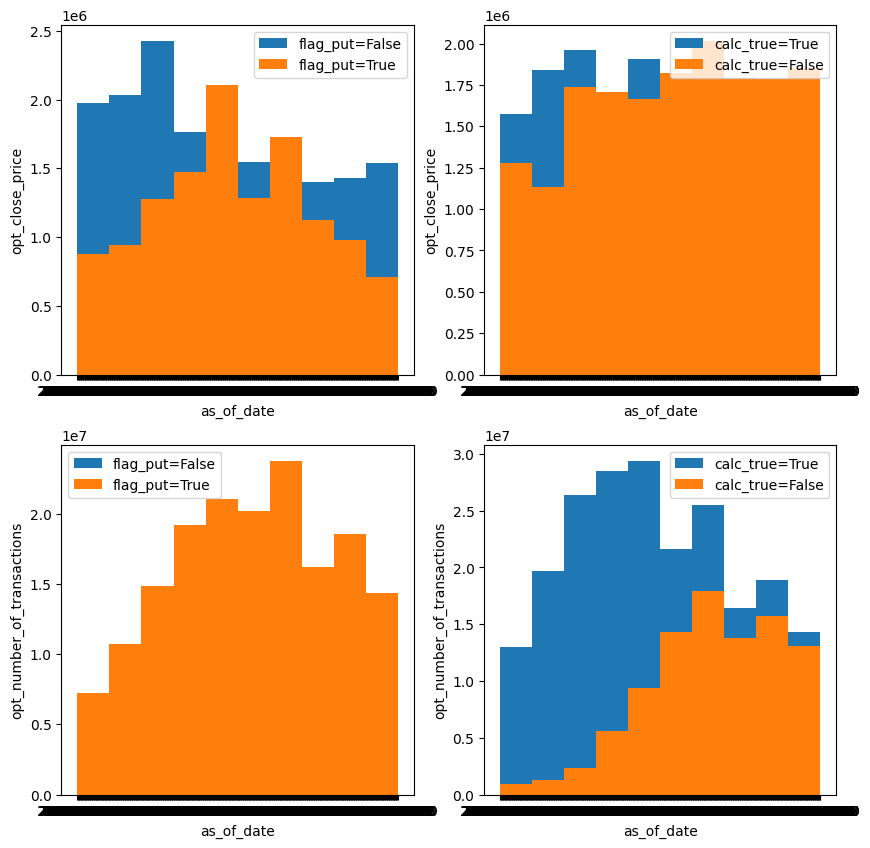

In [19]:
import matplotlib.pyplot as plt

# Assuming distro_df is already defined and contains the relevant data
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram for opt_close_price, split by flag
axs[0, 0].hist(distro_df[distro_df['flag_put'] == False]['as_of_date'], weights=distro_df[distro_df['flag_put'] == False]['opt_close_price'])
axs[0, 0].hist(distro_df[distro_df['flag_put'] == True]['as_of_date'], weights=distro_df[distro_df['flag_put'] == True]['opt_close_price'])
axs[0, 0].set_xlabel('as_of_date')
axs[0, 0].set_ylabel('opt_close_price')
axs[0, 0].legend(['flag_put=False', 'flag_put=True'])

# Histogram for opt_close_price, split by calc_true
axs[0, 1].hist(distro_df[distro_df['calc_true'] == True]['as_of_date'], weights=distro_df[distro_df['calc_true'] == True]['opt_close_price'])
axs[0, 1].hist(distro_df[distro_df['calc_true'] == False]['as_of_date'], weights=distro_df[distro_df['calc_true'] == False]['opt_close_price'])
axs[0, 1].set_xlabel('as_of_date')
axs[0, 1].set_ylabel('opt_close_price')
axs[0, 1].legend(['calc_true=True', 'calc_true=False'])

# Histogram for opt_number_of_transactions, split by flag
axs[1, 0].hist(distro_df[distro_df['flag_put'] == False]['as_of_date'], weights=distro_df[distro_df['flag_put'] == False]['opt_number_of_transactions'])
axs[1, 0].hist(distro_df[distro_df['flag_put'] == True]['as_of_date'], weights=distro_df[distro_df['flag_put'] == True]['opt_number_of_transactions'])
axs[1, 0].set_xlabel('as_of_date')
axs[1, 0].set_ylabel('opt_number_of_transactions')
axs[1, 0].legend(['flag_put=False', 'flag_put=True'])

# Histogram for opt_number_of_transactions, split by calc_true
axs[1, 1].hist(distro_df[distro_df['calc_true'] == True]['as_of_date'], weights=distro_df[distro_df['calc_true'] == True]['opt_number_of_transactions'])
axs[1, 1].hist(distro_df[distro_df['calc_true'] == False]['as_of_date'], weights=distro_df[distro_df['calc_true'] == False]['opt_number_of_transactions'])
axs[1, 1].set_xlabel('as_of_date')
axs[1, 1].set_ylabel('opt_number_of_transactions')
axs[1, 1].legend(['calc_true=True', 'calc_true=False'])

plt.show()